In [100]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json
import pandas as pd

file_dir = "/data03/sunyi/time_constrained_cot/outputs/2_6"
file_dir2 = "/data03/sunyi/time_constrained_cot/outputs/2_6_c2f_modified"
model_list = [
    "NovaSky-AI/Sky-T1-32B-Preview",
    "Qwen/QwQ-32B-Preview",
    "Qwen/Qwen2.5-32B-Instruct",
    "Qwen/Qwen2.5-14B-Instruct", 
    "Qwen/Qwen2.5-7B-Instruct", 
    "Qwen/Qwen2.5-3B-Instruct", 
    "Qwen/Qwen2.5-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-1.5B-Instruct",
    "Qwen/Qwen2.5-Math-7B-Instruct",
    # "internlm/internlm2_5-1_8b-chat",
    # "internlm/internlm2_5-7b-chat",
    # "internlm/internlm2_5-20b-chat",
    # "mistralai/Mistral-Small-Instruct-2409",
    # "mistralai/Mistral-Nemo-Instruct-2407",
    # "mistralai/Ministral-8B-Instruct-2410",
    # "mistralai/Mathstral-7B-v0.1",
    # "google/gemma-2-27b-it",
    # "google/gemma-2-9b-it",
    # "google/gemma-2-2b-it",
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
    "microsoft/Phi-3.5-mini-instruct",
    "microsoft/phi-4",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
    # "deepseek-ai/DeepSeek-R1-Distill-Llama-8B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.1-8B-Instruct"
]
# o1_like_models = [
#     "Qwen/QwQ-32B-Preview", 
#     "NovaSky-AI/Sky-T1-32B-Preview", 
#     "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
#     "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
#     "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
#     "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
#     "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
# ]

# no_o1_models = [
#     "Qwen/Qwen2.5-32B-Instruct", 
#     "Qwen/Qwen2.5-14B-Instruct", 
#     "Qwen/Qwen2.5-7B-Instruct", 
#     "Qwen/Qwen2.5-3B-Instruct", 
#     "Qwen/Qwen2.5-1.5B-Instruct",
#     "Qwen/Qwen2.5-Math-1.5B-Instruct",
#     "Qwen/Qwen2.5-Math-7B-Instruct",
    
#     "mistralai/Mistral-Small-Instruct-2409",
#     "mistralai/Mistral-Nemo-Instruct-2407",
#     "mistralai/Ministral-8B-Instruct-2410",
#     "mistralai/Mathstral-7B-v0.1",
    
#     "google/gemma-2-27b-it",
#     "google/gemma-2-9b-it",
#     "google/gemma-2-2b-it",
    
#     "microsoft/Phi-3-medium-128k-instruct",
#     "microsoft/Phi-3-small-128k-instruct",
#     "microsoft/Phi-3-mini-128k-instruct",
#     "microsoft/Phi-3.5-mini-instruct",
#     "microsoft/phi-4",
    
#     "meta-llama/Llama-3.2-3B-Instruct",
#     "meta-llama/Llama-3.2-1B-Instruct",
#     "meta-llama/Llama-3.1-8B-Instruct"
# ]

# model_list = o1_like_models + no_o1_models

# PROMP_LIST = [ "-sbs-budget-hard", "-c2f", "-sbs", "-aav", "-sbs-hard"]

PROMP_LIST = [ "-sbs", "-aav", "-sbs-hard", "-aav-hard","-c2f","-c2f-hard"]
PROMP_LIST2 = [ "-c2f","-c2f-hard"]
# PROMP_LIST = [ "-c2f","-c2f-hard"]
# PROMP_LIST = [  "-sbs", "-sbs-hard"]
# PROMP_LIST = [ "-aav", "-aav-hard"]

In [101]:
MODEL_SERIES_MAP = {
    "NovaSky-AI/Sky-T1-32B-Preview": "qwen",
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "Qwen/Qwen2.5-Math-1.5B-Instruct": "qwen-math",
    "Qwen/Qwen2.5-Math-7B-Instruct": "qwen-math",
    
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
    
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B": "deepseek-r1-distill",
    "deepseek-ai/DeepSeek-R1-Distill-Llama-8B": "deepseek-r1-distill",
    
    "meta-llama/Llama-3.2-3B-Instruct": "llama",
    "meta-llama/Llama-3.2-1B-Instruct": "llama",
    "meta-llama/Llama-3.1-8B-Instruct": "llama"
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST],
    "llama": ["llama"+prompt for prompt in PROMP_LIST]
}

MODEL_SERIES_PROMPT_TYPE_MAP_c2f = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST2],
    "qwen-math": ["qwen-math" + prompt for prompt in PROMP_LIST2],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST2],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST2],
    "phi3mini": ["phi3mini"+prompt for prompt in PROMP_LIST2],
    "phi3small": ["phi3small"+prompt for prompt in PROMP_LIST2],
    "phi3medium": ["phi3medium"+prompt for prompt in PROMP_LIST2],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST2],
    "deepseek-r1-distill": ["deepseek-r1-distill"+prompt for prompt in PROMP_LIST2],
    "llama": ["llama"+prompt for prompt in PROMP_LIST2]
}

In [102]:
def gen_budget_list(budget, data_name, model):
    if budget == -1:
        return [-1]
    elif budget == 1:
        o1_like_models = [
            "Qwen/QwQ-32B-Preview", 
            "Skywork/Skywork-o1-Open-Llama-3.1-8B", 
            "PowerInfer/SmallThinker-3B-Preview",
            "NovaSky-AI/Sky-T1-32B-Preview", 
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-7B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-14B",
            "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B",
            "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"
        ]
        if model in o1_like_models: # maybe should extend to longer sequence
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 100):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 601, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 300, 25):
                    budget_list.append(i)
                for i in range(300, 600, 50):
                    budget_list.append(i)
                for i in range(600, 1201, 100):
                    budget_list.append(i)
        
        return budget_list


In [103]:
dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"

In [104]:
model_acc_dicts = {}
model_acc_dicts_c2f = {}
prompt_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

for model in model_list:
    model_acc_dict_c2f = {}
    budget_list_c2f = gen_budget_list(1, dataset, model)
    model_prompt_list_c2f = MODEL_SERIES_PROMPT_TYPE_MAP_c2f[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list_c2f:
        acc_list = []
        for budget in budget_list_c2f:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir2, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict_c2f[prompt_type] = acc_list
    model_acc_dicts_c2f[model] = model_acc_dict_c2f

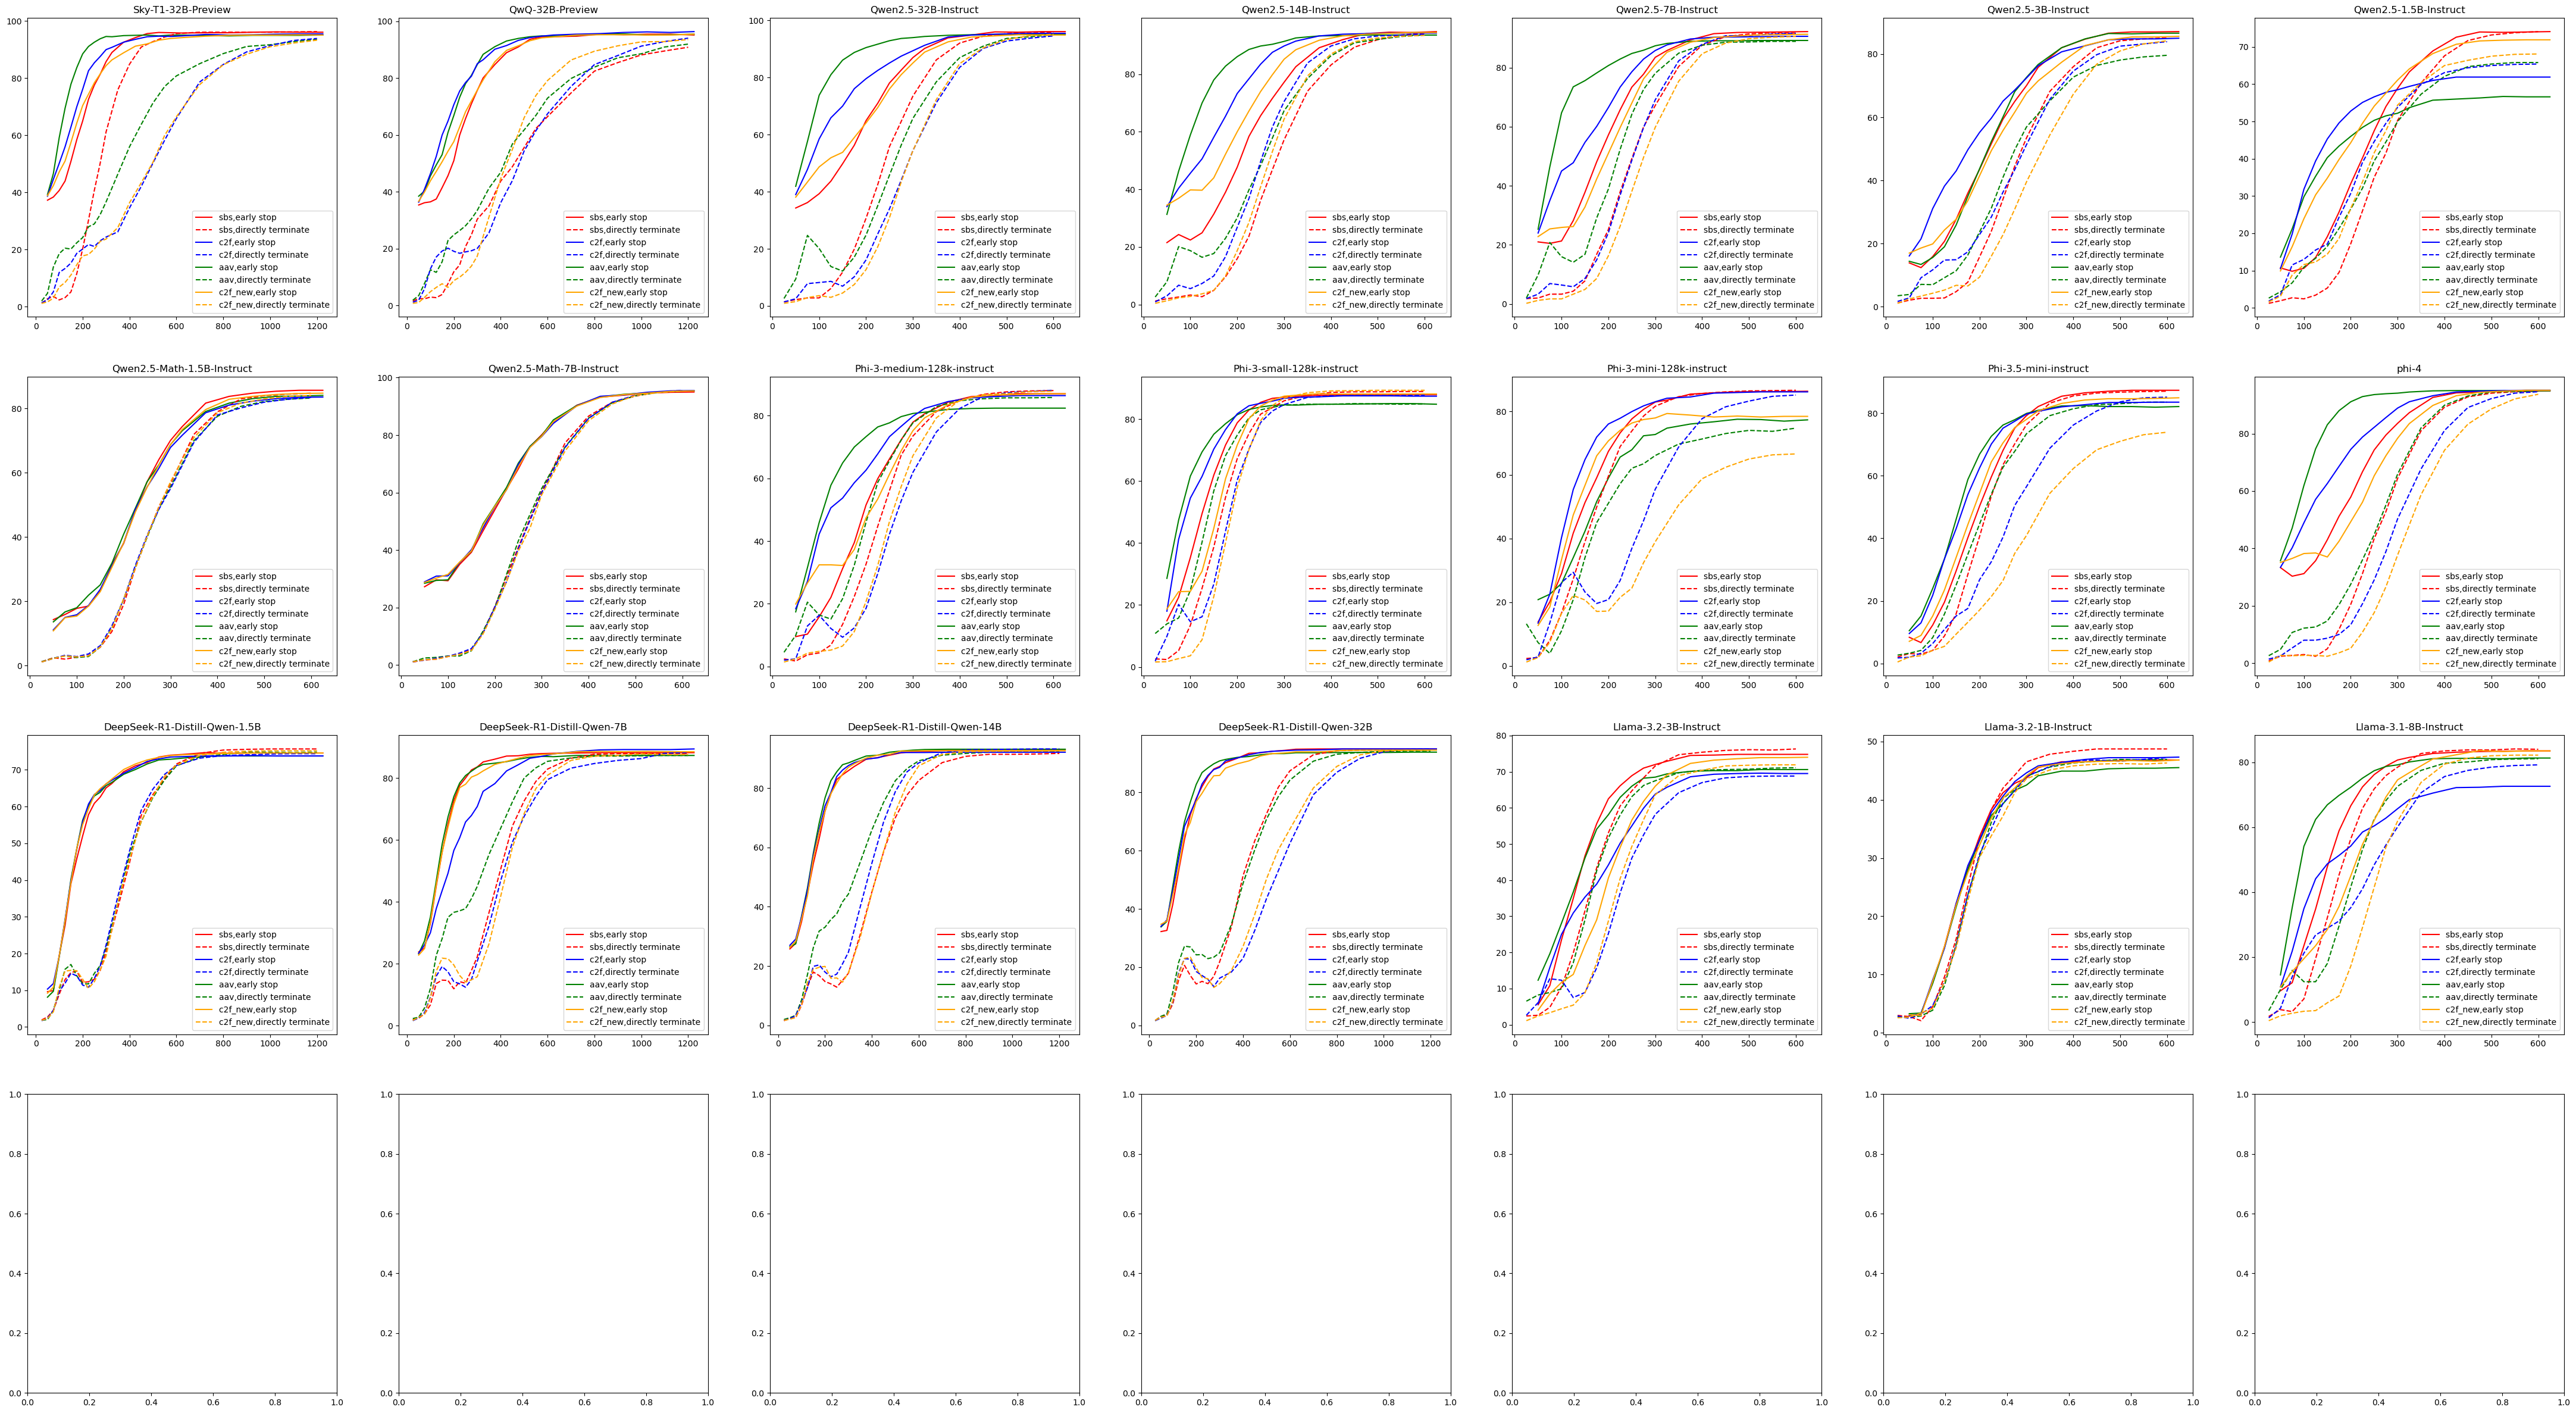

In [ ]:
from matplotlib.lines import Line2D

fig, axs = plt.subplots(4, 7, figsize=(55, 30))
# plot separate image for each model
color_list = ["red", "blue", "green", "orange"]      
axs = axs.flatten()

for index,model in enumerate(model_list):
    for prompt_type in MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]:
        budget_list = gen_budget_list(1, dataset, model)
        if "hard" not in prompt_type:
            budget_list = [budget + 25 for budget in budget_list]
        linestyle = "--" if "hard" in prompt_type else "-"
        if "sbs" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], label=prompt_type, linestyle=linestyle, linewidth=1.5, color=color_list[0])
        elif "c2f" in prompt_type and prompt_type in MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], label=prompt_type, linestyle=linestyle, linewidth=1.5, color=color_list[1])
        elif "aav" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], label=prompt_type, linestyle=linestyle, linewidth=1.5, color=color_list[2])
        

for index,model in enumerate(model_list):
    legend_lines = [
        Line2D([0], [0], color='red', linestyle='-', linewidth=1.5, label='sbs,early stop'),
        Line2D([0], [0], color='red', linestyle='--', linewidth=1.5, label='sbs,directly terminate'),
        Line2D([0], [0], color='blue', linestyle='-', linewidth=1.5, label='c2f,early stop'),
        Line2D([0], [0], color='blue', linestyle='--', linewidth=1.5, label='c2f,directly terminate'),
        Line2D([0], [0], color='green', linestyle='-', linewidth=1.5, label='aav,early stop'),
        Line2D([0], [0], color='green', linestyle='--', linewidth=1.5, label='aav,directly terminate'),
        Line2D([0], [0], color='orange', linestyle='-', linewidth=1.5, label='c2f_new,early stop'),
        Line2D([0], [0], color='orange', linestyle='--', linewidth=1.5, label='c2f_new,directly terminate')
    ]
    for prompt_type in MODEL_SERIES_PROMPT_TYPE_MAP_c2f[MODEL_SERIES_MAP[model]]:
        budget_list = gen_budget_list(1, dataset, model)
        if "hard" not in prompt_type:
            budget_list = [budget + 25 for budget in budget_list]
        linestyle = "--" if "hard" in prompt_type else "-"
        if "c2f" in prompt_type:
            axs[index].plot(budget_list, model_acc_dicts_c2f[model][prompt_type], label=prompt_type, linestyle=linestyle, linewidth=1.5, color=color_list[3])
    axs[index].legend(handles=legend_lines, loc='lower right')
    axs[index].set_title(model.split("/")[-1])

plt.show()


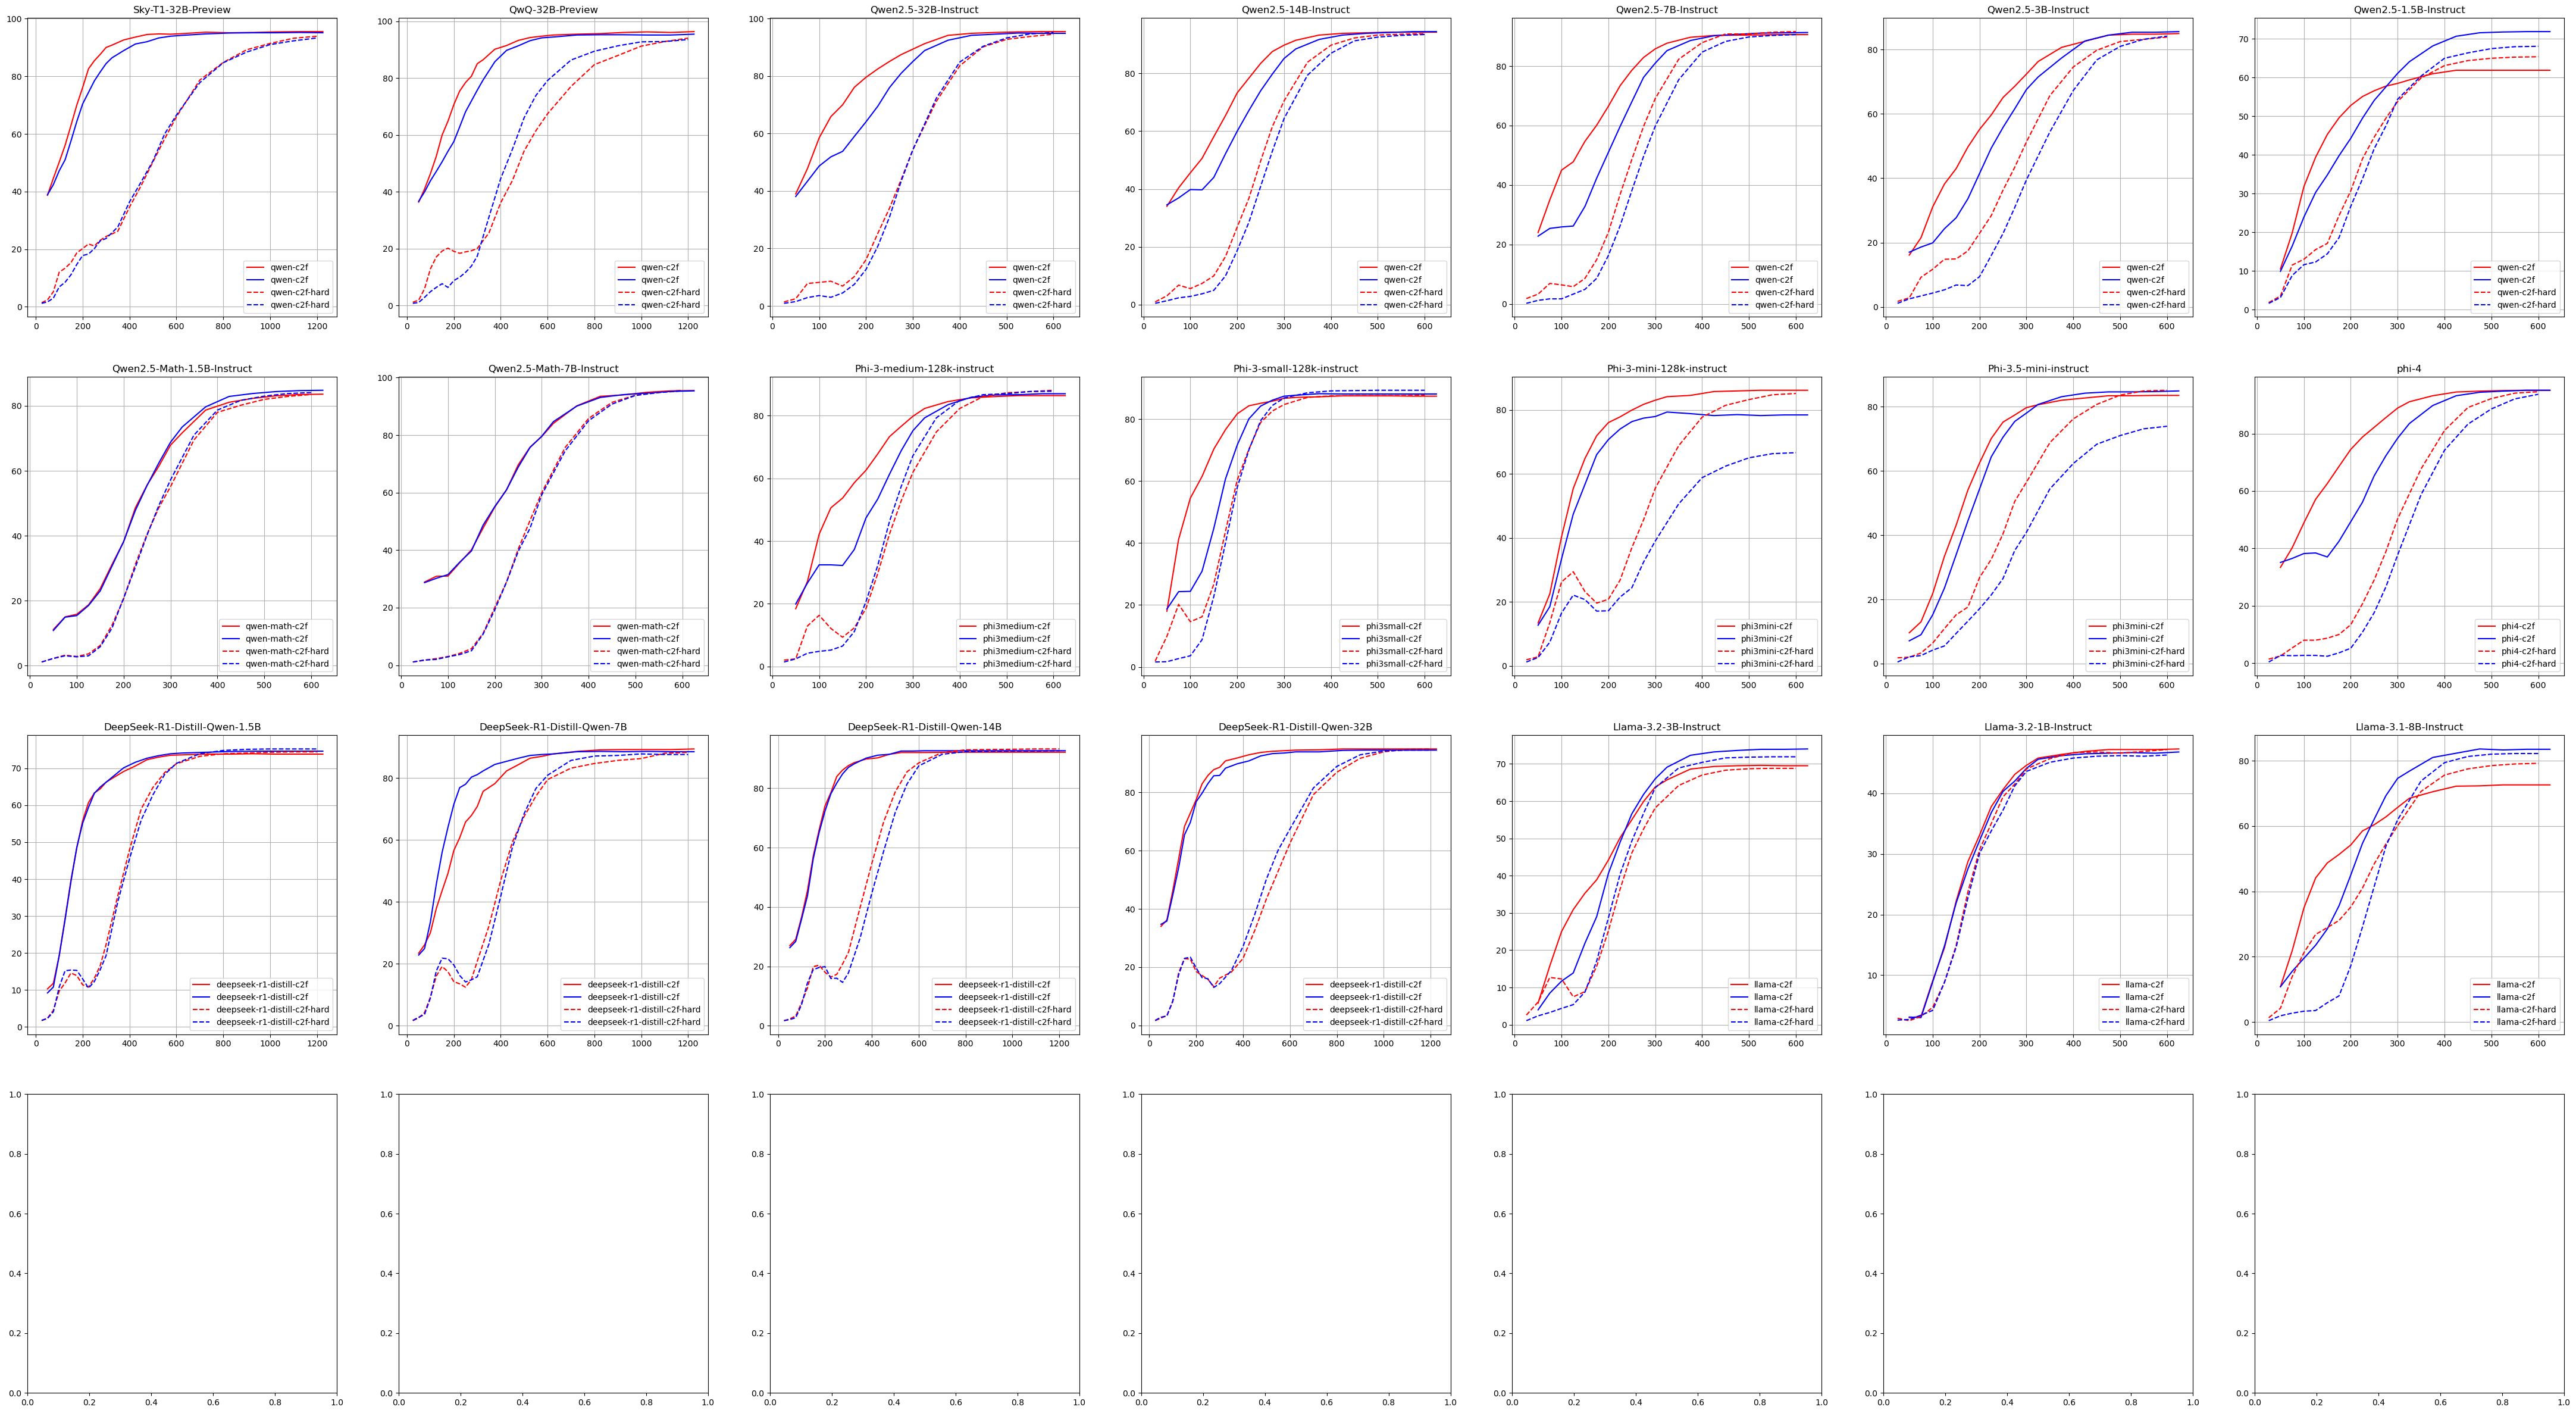

In [106]:
fig, axs = plt.subplots(4, 7, figsize=(55, 30))
# plot separate image for each model
color_list = ["red", "blue"]      
axs = axs.flatten()

for index,model in enumerate(model_list):
    for prompt_type in MODEL_SERIES_PROMPT_TYPE_MAP_c2f[MODEL_SERIES_MAP[model]]:
        budget_list = gen_budget_list(1, dataset, model)
        if "hard" not in prompt_type:
            budget_list = [budget + 25 for budget in budget_list]
        linestyle = "--" if "hard" in prompt_type else "-"
        axs[index].plot(budget_list, model_acc_dicts[model][prompt_type], label=prompt_type, linestyle=linestyle, linewidth=1.5, color=color_list[0])
        axs[index].plot(budget_list, model_acc_dicts_c2f[model][prompt_type], label=prompt_type, linestyle=linestyle, linewidth=1.5, color=color_list[1])
    axs[index].legend(loc="lower right")
    axs[index].set_title(model.split("/")[-1])
    axs[index].grid(True)
plt.show()
